## Supermarket Sales

### Introduction to the Supermarket Dataset

#### This dataset provides a comprehensive view of transactions recorded by a supermarket chain over a specific three-month period in 2019. It includes detailed information about sales, customer demographics, and operational metrics. The dataset is structured with various attributes that offer insights into business performance and customer behavior.

#### Key Features of the Dataset:
#### Transaction Details:

#### Invoice ID: Unique identifier for each transaction.
#### Date and Time: Timestamp of the transaction for trend analysis.
#### Branch & City: Location data indicating which branch in Yangon, Mandalay, or Naypyitaw recorded the sale.
#### Customer Information:


#### Customer Type: Categorized as "Member" or "Normal" (non-member).
#### Gender: Gender of the customer involved in the transaction.
#### Product and Sales Information:


#### Product Line: Categories such as Health and Beauty, Electronic Accessories, and Food and Beverages.
#### Unit Price: Price of a single unit of the product.
#### Quantity: Number of items purchased.
#### Total and Tax (5%): Total amount including tax for the transaction.
#### Financial Metrics:

#### Cost of Goods Sold (COGS): The direct cost of products sold.
#### Gross Income and Margin: Metrics to evaluate profitability per transaction.
#### Additional Metrics:

#### Payment Method: Cash, Credit Card, or E-Wallet.
#### Customer Rating: Feedback scores provided by customers (scale of 1–10).


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#read the data
df=pd.read_csv('D:\DATAANALYTICS\DATASET\\supermarket_sales.csv')
print(df.head(10))
#print(df.tail(10))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22

In [6]:
# To find the dtype  in the data of each columns 
print(df.info())
#change the dtype of  date and time  columns
df['date']=df['Date'].astype('datetime64[ns]')
df['Time']=df['Time'].astype('datetime64[ns]')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# find the null values from the columns
print(df.isna().sum())
# To drop the duplicates
print(df.drop_duplicates(inplace=True))

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
dtype: int64
None


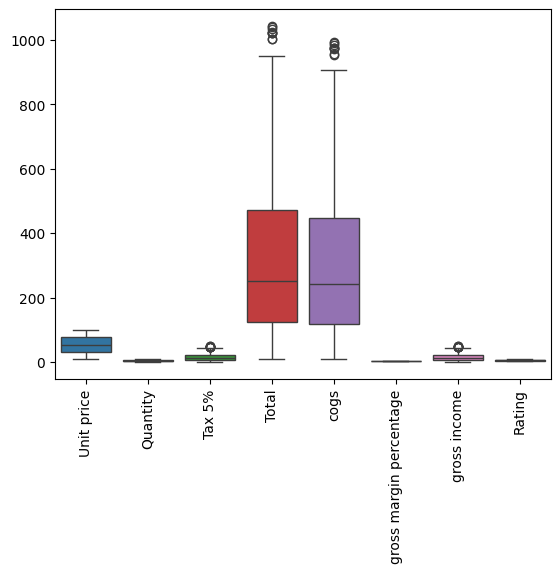

In [8]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Unit price'),
  Text(1, 0, 'Quantity'),
  Text(2, 0, 'Tax 5%'),
  Text(3, 0, 'Total'),
  Text(4, 0, 'cogs'),
  Text(5, 0, 'gross margin percentage'),
  Text(6, 0, 'gross income'),
  Text(7, 0, 'Rating'),
  Text(8, 0, 'z_score')])

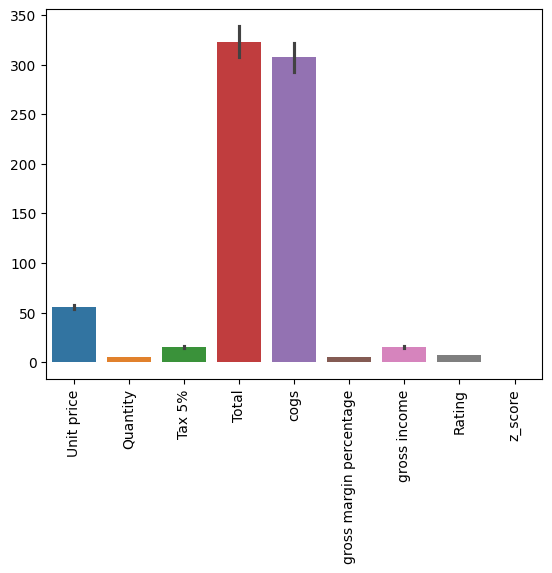

In [9]:
df['z_score']=(df['Total']-df['Total'].mean())/df['Total'].std()
threshold=3
sns.barplot(df)
plt.xticks(rotation=90)



In [10]:
df_no_outliers=df[df['z_score'].abs()<=threshold]
df_no_outliers=df_no_outliers.drop(columns=['z_score'])

print(df_no_outliers)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

### In [1]:
#### To find the count of each payment method

In [11]:
most_payment_method=df.groupby('Payment').size()
print(most_payment_method)




Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64


### In [2]:
#### Collect the full details of most tax payied person on unit price over 50

In [12]:
data=df[df['Unit price']>50]
ff=data.groupby('Tax 5%').min()
print(ff.tail(1))


         Invoice ID Branch       City Customer type  Gender  \
Tax 5%                                                        
49.65   860-79-0874      C  Naypyitaw        Member  Female   

               Product line  Unit price  Quantity    Total       Date  \
Tax 5%                                                                  
49.65   Fashion accessories        99.3        10  1042.65  2/15/2019   

                      Time      Payment   cogs  gross margin percentage  \
Tax 5%                                                                    
49.65  2024-12-09 14:53:00  Credit card  993.0                 4.761905   

        gross income  Rating       date   z_score  
Tax 5%                                             
49.65          49.65     6.6 2019-02-15  2.926906  


### In [3]:
#### find the most purchase quantity

In [13]:
rr=df['Quantity'].value_counts()
print(rr)


Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64


### In [4]:
#### find the number of normal customer from yangon city

In [14]:
rr=df.groupby('Customer type').size()
print(rr)
normal_yangon_count = df[(df['City'] == 'Yangon') & (df['Customer type'] == 'Normal')].shape[0]
print('normal customer from yangon city')
print(normal_yangon_count)




Customer type
Member    501
Normal    499
dtype: int64
normal customer from yangon city
173


### In [5]:
#### create a new column on the basic of time 

In [15]:
def categorize_time(time):
    if time.hour < 12:
        return "Morning"
    elif time.hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df['Period'] = df['Time'].apply(categorize_time)

# Display the updated DataFrame
# Select and print only the Time and Period columns
print(df[['Time', 'Period']])

                   Time     Period
0   2024-12-09 13:08:00  Afternoon
1   2024-12-09 10:29:00    Morning
2   2024-12-09 13:23:00  Afternoon
3   2024-12-09 20:33:00    Evening
4   2024-12-09 10:37:00    Morning
..                  ...        ...
995 2024-12-09 13:46:00  Afternoon
996 2024-12-09 17:16:00  Afternoon
997 2024-12-09 13:22:00  Afternoon
998 2024-12-09 15:33:00  Afternoon
999 2024-12-09 13:28:00  Afternoon

[1000 rows x 2 columns]


### In [6]:
#### how many various product on product column and count its value

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


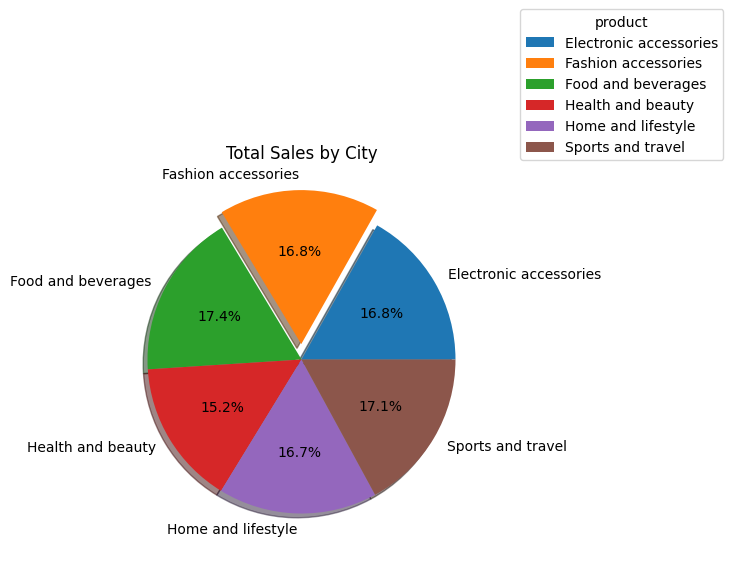

In [16]:



# Calculate total sales per city
total_sales_per_city = df.groupby('Product line')['Total'].sum()
print(total_sales_per_city)

# Generate labels and explode values dynamically
mylabels = total_sales_per_city.index.tolist()  # Ensure labels match city order
myexplode = [0] * len(total_sales_per_city)  # No explosion by default

# Optional: Explode a specific slice (e.g., second city)
myexplode[1] = 0.1  # Explode the second city (index 1)

# Create pie chart
plt.figure(figsize=(8, 5))  # Set the figure size
plt.pie(
    total_sales_per_city, 
    labels=mylabels, 
    explode=myexplode, 
    autopct='%1.1f%%', 
    shadow=True
)
plt.title("Total Sales by City")
plt.legend(title="product", loc="best", bbox_to_anchor=(1.05, 1))
plt.show()



### In [7]:
#### what is the covariance of 'cogs'column and 'gross income' column

                      cogs  gross income
cogs          54838.637658   2741.931883
gross income   2741.931883    137.096594


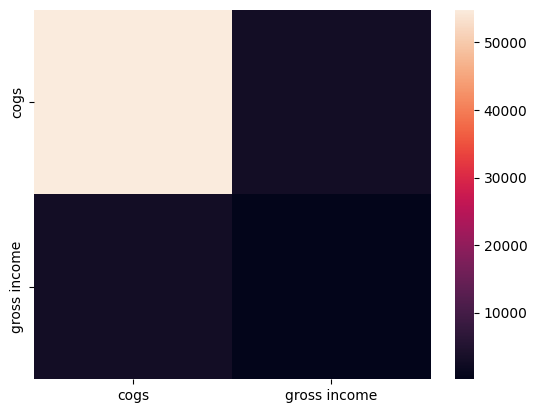

In [17]:
# Compute covariance
covariance_matrix = df[["cogs", "gross income"]].cov()
print(covariance_matrix)
sns.heatmap(covariance_matrix)
plt.show()


### In [8]:
#### Show the relation between the three column 'unit price','quantity'and 'tax 5%'

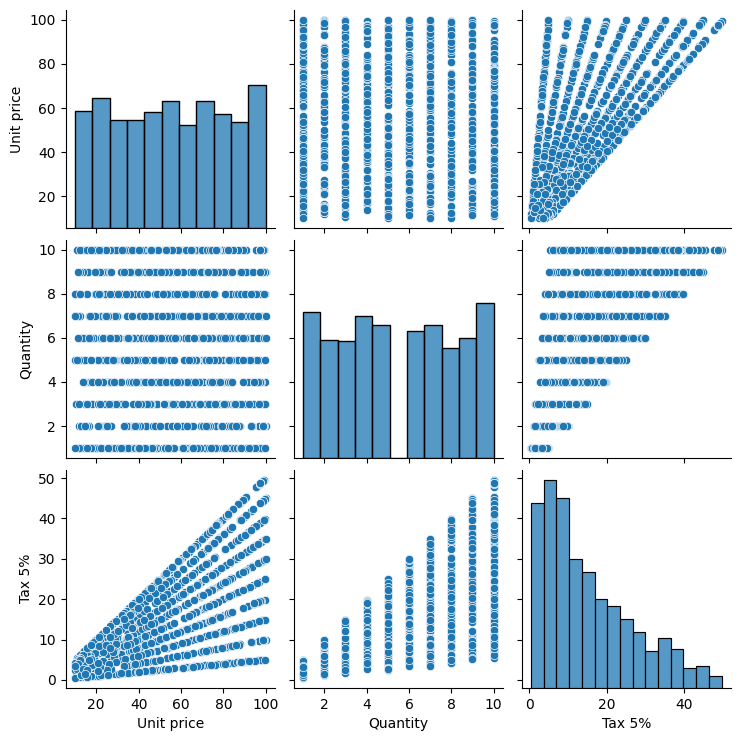

In [18]:

# Pairplot for multiple columns
sns.pairplot(df[["Unit price", "Quantity","Tax 5%"]])
plt.show()


### In [9]:
#### Compair the total sale 1\1\2019 to 2\13\2019 and 2\14\2019 to 3\31\2019 on a pie chart

Total sales from 1/1/2019 to 1/13/2019: 130352.8065
Total sales from 2/14/2019 to 3/31/2019: 167358.3345


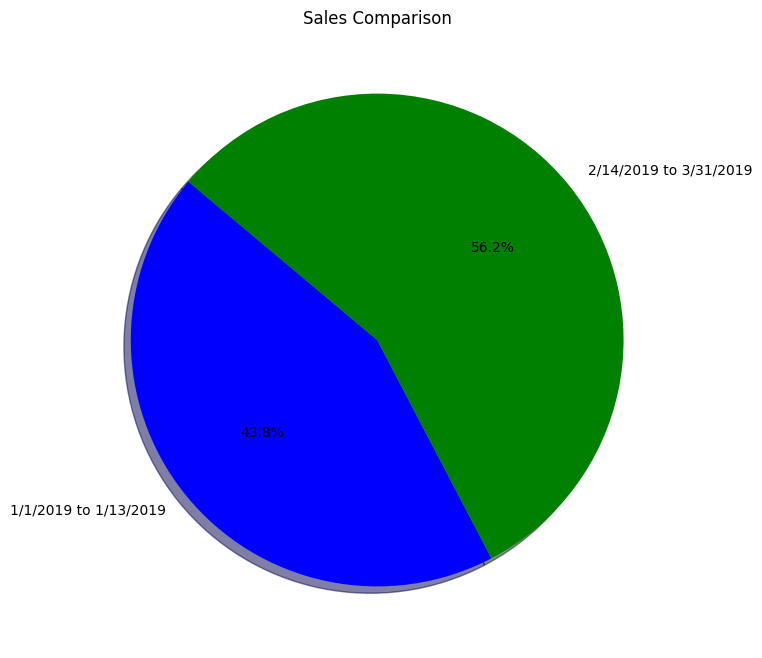

In [19]:

start_date = '1/1/2019'
end_date = '2/13/2019'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Calculate the total sales in the date range
total_sales = filtered_df['Total'].sum()

print("Total sales from 1/1/2019 to 1/13/2019:", total_sales)
date_end = '3/31/2019'
date_start = '2/14/2019'
filter_df = df[(df['Date'] >= date_start) & (df['Date'] <= date_end)]

# Calculate the total sales in the date range
sales_total = filter_df['Total'].sum()
print("Total sales from 2/14/2019 to 3/31/2019:",sales_total)



# Example data
sales_data = [130352.8065,167358.3345]  # Example: Sales for two ranges
labels = ['1/1/2019 to 1/13/2019', '2/14/2019 to 3/31/2019']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'], shadow=True)
plt.title('Sales Comparison')
plt.show()




### In [10]:
#### show the relation of gross income and rating on any chart  

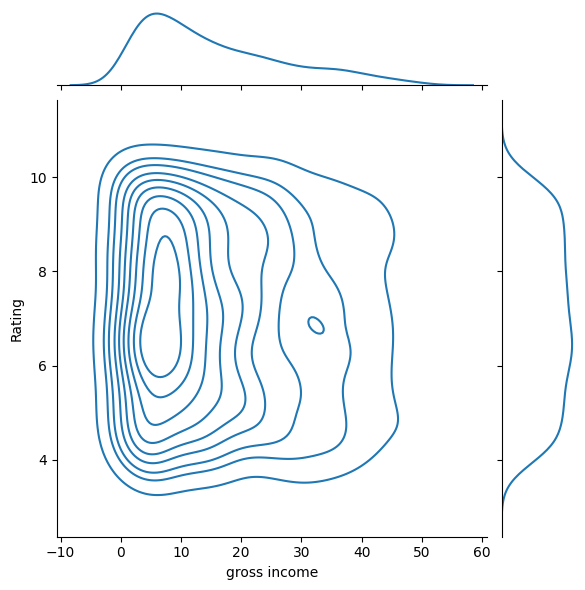

In [20]:


# Use the original DataFrame for the joint plot
sns.jointplot(x="gross income", y="Rating", data=df, kind="kde")
plt.show()





### In [11]:
#### what is the total sale of each citys

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


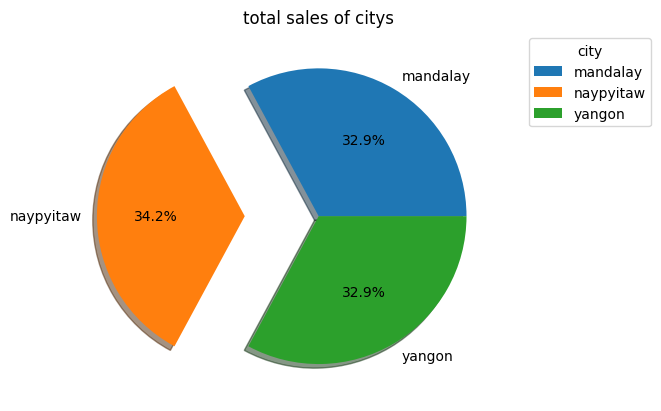

<Figure size 1000x1200 with 0 Axes>

In [21]:
total_sales_per_city = df.groupby('City')['Total'].sum()
print(total_sales_per_city)
mylabels=['mandalay','naypyitaw','yangon']
autopct=myexplode=[0,0.5,0]
plt.pie(total_sales_per_city,labels=mylabels,explode=myexplode,autopct='%1.1f%%',shadow=True)
plt.title("total sales of citys")
plt.legend(title='city',loc="best",bbox_to_anchor=(1.05,1))
plt.figure(figsize=(10,12))
plt.show()







### In [12]:
#### Plot the Relationship Between Gross Income and Rating

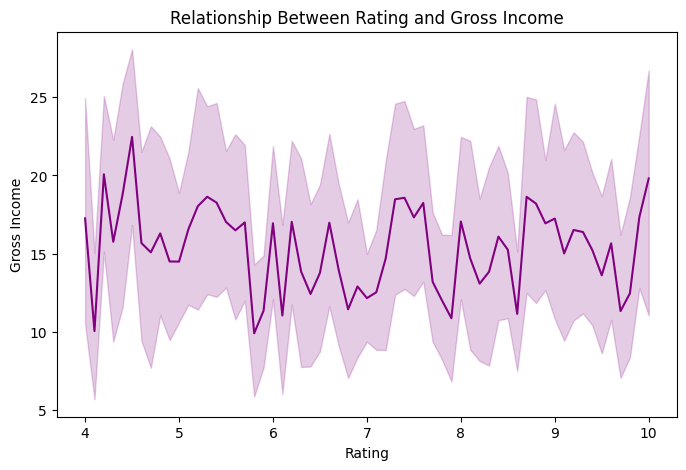

In [22]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Rating', y='gross income', data=df, color='purple')
plt.title('Relationship Between Rating and Gross Income')
plt.xlabel('Rating')
plt.ylabel('Gross Income')
plt.show()


### In [13]:
#### Distribution of Branches

Branch
A    340
B    332
C    328
dtype: int64


C:\Users\91859\AppData\Local\Temp\ipykernel_16336\3568735864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Branch', data=df, palette='viridis')


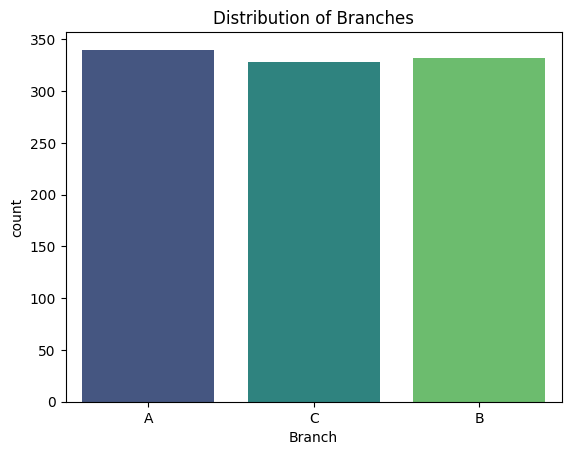

In [23]:

grouped_branch=df.groupby('Branch').size()
print(grouped_branch)
sns.countplot(x='Branch', data=df, palette='viridis')
plt.title('Distribution of Branches')
plt.show()


### In [14]:
#### which date were most sales happened

In [25]:
daily_sales = df.groupby("Date")["Total"].sum()

# Find the day with the most sales
most_sales_day = daily_sales.idxmax()
most_sales_amount = daily_sales.max()

print(f"The day with the most sales is {most_sales_day} with total sales of {most_sales_amount:.2f}.")


The day with the most sales is 3/9/2019 with total sales of 7474.05.


### Key Summaries:
#### Payment Methods:

#### Cash: 344 transactions
#### Credit Card: 311 transactions
#### E-Wallet: 345 transactions
#### This indicates a balanced distribution of payment methods, with E-Wallet slightly leading in popularity.
#### Customer Types:

#### Members: 501 transactions
#### Normal (Non-Members): 499 transactions
#### The nearly equal split suggests a healthy mix of loyalty-driven and casual shoppers.
#### Sales by Product Line:

#### Electronic Accessories: $54,337.53
#### Fashion Accessories: $54,305.90
#### Food and Beverages: $56,144.84
#### Health and Beauty: $49,193.74
#### Home and Lifestyle: $53,861.91
#### Sports and Travel: $55,122.83
#### Food and Beverages recorded the highest sales, indicating strong customer demand, followed by Sports and Travel.
#### Financial Metrics:

#### Cost of Goods Sold (COGS): $54,838.64 (total direct cost of products sold).
#### Gross Income: $2,741.93 (profit after deducting costs).
#### The overall profitability is modest, suggesting potential opportunities for pricing optimization or cost reduction.
